# Project: Wrangle and Analyze Data

### Author: Muhammad Usman Siddiqui

In [1]:
import requests
import pandas as pd
import tweepy
import json
import time
import matplotlib.pyplot as plt
from timeit import default_timer as timer
import numpy as np

%matplotlib inline


## Gathering Data

In [2]:
# Files Provided
archive = pd.read_csv('twitter-archive-enhanced.csv')

# Gathering the tsv file on Udacity's server 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
req = requests.get(url)
with open('image-predictions.tsv' , 'wb') as file:
    file.write(req.content)
    
prediction = pd.read_csv('image-predictions.tsv', sep='\t')

### Twitter API

In [3]:
# The code used below is provided by Udacity. 

consumer_key = '***'       # API key
consumer_secret = '****' # API secret key
access_token = '****' # Access token
access_secret = '******' # Access token secret

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)


In [6]:
jpson = {}
error = []

id_list = archive.tweet_id.tolist()
start = time.time()


with open('tweet-json.txt', 'w') as file:
    for t_id in id_list:
        try:
            status = api.get_status(t_id, wait_on_rate_limit = True, wait_on_rate_limit_notify = True, tweet_mode='extended')
            jpson[str(t_id)] = status._json 
        except: 
            print (f'Error : {t_id}' )
            error.append(str(t_id))
            

end = time.time()

with open('tweet-json.txt', mode = 'w') as file:
    json.dump(jpson, file)

print(end-start)

Error : 888202515573088257
Error : 873697596434513921
Error : 872668790621863937
Error : 872261713294495745
Error : 869988702071779329
Error : 866816280283807744
Error : 861769973181624320
Error : 856602993587888130
Error : 851953902622658560
Error : 845459076796616705
Error : 844704788403113984
Error : 842892208864923648
Error : 837366284874571778
Error : 837012587749474308
Error : 829374341691346946
Error : 827228250799742977
Error : 812747805718642688
Error : 802247111496568832
Error : 779123168116150273
Error : 775096608509886464
Error : 771004394259247104
Error : 770743923962707968
Error : 759566828574212096
Rate limit reached. Sleeping for: 735
Error : 754011816964026368
Error : 680055455951884288
Rate limit reached. Sleeping for: 735
1914.7757592201233


In [4]:
api_json = pd.read_json('tweet-json.txt', orient = 'index') 


# Assessing Data

### Twitter-archive-enhanced dataset

In [5]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


###### Quality Issue 1: Taking a look at the dataset, some of the dog names are incorrect. Characters such as a, the, and an are present instead of a name in some rows. 

###### Quality Issue 2: Null values are represented by None in the doggo, floofer, pupper, and puppo columns.

###### Tidiess issue 1: The doggo, floofer, pupper, and puppo columns should be reduced to one column. 


In [8]:
archive.shape

(2356, 17)

In [9]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
sum(archive.tweet_id.duplicated())
#This means no rows were duplicated

0

In [11]:
archive.name.value_counts()

#Incorrect names such as a, the, and an are assigned to some rows

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
Lucy          11
Penny         10
Tucker        10
Lola          10
Winston        9
Bo             9
the            8
Sadie          8
Bailey         7
Buddy          7
an             7
Toby           7
Daisy          7
Leo            6
Rusty          6
Scout          6
Milo           6
Stanley        6
Jack           6
Koda           6
Dave           6
Jax            6
Bella          6
Oscar          6
Sammy          5
            ... 
Gilbert        1
Jameson        1
Jomathan       1
Bilbo          1
Brady          1
Linus          1
Fabio          1
Alexander      1
Furzey         1
Raphael        1
Carbon         1
light          1
Spanky         1
Thor           1
Arlen          1
Stella         1
Hermione       1
Tessa          1
Boston         1
Ralphy         1
Sully          1
Dale           1
Fwed           1
Finnegus       1
Kloey          1
Amy            1
Buckley        1
Corey         

In [13]:
archive.rating_numerator.value_counts()

# There are extreme values in the numerator
# which must be removed

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [45]:
# Data has outliers so median gives a good sense of the data
archive.rating_numerator.median()

11.0

In [14]:
archive.rating_denominator.value_counts()

#The denominator is supposed to be 10, there are some illogical value.

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

###### Quality Issue 3: The numerator rating data contains some extreme values. All numerator values above 50 and values below 7 are removed to get rid of the extremes.  

###### Quality Issue 4: The denominator rating should be constant at 10, but some rows have a different denominator. 

###### Quality Issue 5: The retweet and replies columns do not have all null values this means that some tweets are not orignial but are retweets and replies thus have to be deleted.

## Image-prediction dataset 

In [13]:
prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [14]:
prediction.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [26]:
prediction.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
170,668992363537309700,https://pbs.twimg.com/media/CUi9ARGWUAEyWqo.jpg,1,lynx,0.287506,False,tabby,0.206048,False,koala,0.081419,False
528,676776431406465024,https://pbs.twimg.com/ext_tw_video_thumb/67677...,1,doormat,0.201346,False,dishwasher,0.191749,False,microwave,0.038110,False
1386,766069199026450432,https://pbs.twimg.com/media/CqGf3xaXYAEh3ak.jpg,1,redbone,0.484855,True,beagle,0.437527,True,basset,0.010585,True
35,666437273139982337,https://pbs.twimg.com/media/CT-pKmRWIAAxUWj.jpg,1,Chihuahua,0.671853,True,beagle,0.124680,True,Saluki,0.044094,True
1088,718971898235854848,https://pbs.twimg.com/media/CfpNGTHUIAAA8XC.jpg,1,golden_retriever,0.140394,True,Saint_Bernard,0.118769,True,Labrador_retriever,0.075492,True


###### Quality Issue 6: Non standard capitilization in the p1, p2, and p3 columns 

In [22]:
prediction.shape

#This means some tweets without images are present 
#which should be removed

(2075, 12)

###### Quality Issue 7: Some tweets without images are present and must be removed.

In [24]:
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
sum(prediction.jpg_url.duplicated())

66

###### Quality Issue 8: The tweet id is uniqe, but the image url is repeated for some dogs, so these duplicate rows must be removed.

### Twitter API

In [29]:
api_json.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
1998-04-12 22:37:23.555336193,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",34719,0,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,7255,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1998-04-10 03:03:41.306343426,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",30083,0,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,5434,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1998-04-05 22:26:21.378084864,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",22639,0,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,3583,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1998-04-04 11:32:37.279858688,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",37991,0,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,7461,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1998-03-31 06:59:18.926688256,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",36274,0,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,8012,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [30]:
api_json.tail()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
1991-02-08 21:40:48.165822465,NaN,NaN,2015-11-16 00:24:50,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...",92,0,Here we have a 1949 1st generation vulpix. Enj...,NaN,...,NaN,NaN,NaN,NaN,37,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1991-02-08 20:17:06.329800704,NaN,NaN,2015-11-16 00:04:52,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...",255,0,This is a purebred Piers Morgan. Loves to Netf...,NaN,...,NaN,NaN,NaN,NaN,119,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1991-02-08 17:16:52.701032449,NaN,NaN,2015-11-15 23:21:54,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...",105,0,Here is a very happy pup. Big fan of well-main...,NaN,...,NaN,NaN,NaN,NaN,38,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...",117,0,This is a western brown Mitsubishi terrier. Up...,NaN,...,NaN,NaN,NaN,NaN,41,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...",2332,0,Here we have a Japanese Irish Setter. Lost eye...,NaN,...,NaN,NaN,NaN,NaN,439,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [32]:
api_json.shape

(2331, 32)

In [33]:
api_json.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2331 entries, 1998-04-12 22:37:23.555336193 to 1991-02-08 13:48:08.022790149
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2331 non-null datetime64[ns]
display_text_range               2331 non-null object
entities                         2331 non-null object
extended_entities                2059 non-null object
favorite_count                   2331 non-null int64
favorited                        2331 non-null int64
full_text                        2331 non-null object
geo                              0 non-null float64
id                               2331 non-null int64
id_str                           2331 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              

###### Quality Issue 9: Changing the Timestamp data type from object to datetime.

###### Quality Issue 10: Some rows have incomplete data. 

###### Quality Issue 11: In some rows, one dog is classified twice (doggo, floofer, pupper, puppo). This issue was discovered below while cleaning the data.

###### Tidiness issue 2: All the irrelevant columns need to be dropped. 

###### Tidiness issue 3: All the tables should be merged into one dataset

# Cleaning Data

In [5]:
# First thing is that we need to make copies of the datasets 

archive_c = archive.copy()
prediction_c = prediction.copy()
api_c = api_json.copy()

Note: The issues listed above are numbered based on when they were identified. The cleaning process may not follow the same numbering, an issue with a greater number may be cleaned first if it is logical to do so.

###### Quality Issue 1: Taking a look at the dataset, some of the dog names are incorrect. Characters such as a, the, and an are present instead of a name in some rows. 


In [6]:
# The non-standard names start with a lowercase 

name = []
for i in archive_c['name']:
    if i.islower():
        name.append(i)

# Need to create a list to be able to index later.        
name = list(set(name))
name.append('None')
name

['such',
 'just',
 'space',
 'one',
 'mad',
 'getting',
 'officially',
 'not',
 'quite',
 'his',
 'old',
 'incredibly',
 'very',
 'all',
 'this',
 'the',
 'infuriating',
 'an',
 'unacceptable',
 'a',
 'light',
 'by',
 'actually',
 'life',
 'my',
 'None']

In [7]:
#Replacing the non-standard names to null
archive_c.name.replace(name, np.nan, inplace = True)

In [8]:
# Checking to see if change applied
archive_c.name.value_counts()

Charlie       12
Lucy          11
Cooper        11
Oliver        11
Tucker        10
Penny         10
Lola          10
Winston        9
Bo             9
Sadie          8
Bailey         7
Toby           7
Daisy          7
Buddy          7
Koda           6
Rusty          6
Scout          6
Jack           6
Bella          6
Stanley        6
Milo           6
Leo            6
Jax            6
Oscar          6
Dave           6
Oakley         5
Sunny          5
Alfie          5
Bentley        5
Louis          5
              ..
Gilbert        1
Banjo          1
Jockson        1
Pete           1
Longfellow     1
Ralphie        1
Dex            1
Lacy           1
Traviss        1
Sailor         1
Cupid          1
Kevon          1
Clyde          1
Ulysses        1
Rey            1
Mary           1
Cermet         1
Thor           1
Tycho          1
Noosh          1
Enchilada      1
Lassie         1
Mya            1
Julio          1
Humphrey       1
Bobbay         1
Maisey         1
Alejandro     

###### Quality Issue 3: The numerator rating should be 10 or above, so the authenticity of the ratings below 10 is questionable. Taking the median (11) into account, the ratings above 22 (2 * median) are also questionable. 

In [9]:
numerator = []
for i in archive_c['rating_numerator']: 
     if i < 7 or i >50:
            numerator.append(i)           
numerator

[5,
 420,
 666,
 6,
 182,
 960,
 0,
 75,
 84,
 1,
 75,
 5,
 3,
 4,
 165,
 4,
 5,
 1776,
 6,
 4,
 0,
 6,
 204,
 6,
 4,
 3,
 4,
 99,
 6,
 3,
 80,
 4,
 3,
 60,
 6,
 6,
 6,
 5,
 3,
 1,
 4,
 6,
 5,
 3,
 5,
 5,
 4,
 3,
 5,
 5,
 5,
 4,
 143,
 121,
 6,
 5,
 5,
 5,
 3,
 4,
 6,
 5,
 6,
 2,
 2,
 144,
 6,
 5,
 6,
 5,
 5,
 3,
 6,
 88,
 5,
 1,
 5,
 3,
 5,
 5,
 2,
 5,
 3,
 3,
 1,
 4,
 3,
 6,
 5,
 6,
 6,
 5,
 5,
 6,
 1,
 6,
 6,
 5,
 4,
 6,
 420,
 4,
 2,
 1,
 5,
 6,
 5,
 6,
 5,
 3,
 5,
 5,
 6,
 6,
 5,
 3,
 4,
 3,
 5,
 4,
 2,
 6,
 3,
 5,
 2,
 5,
 1,
 6,
 4,
 3,
 2,
 5,
 4,
 6,
 2,
 6,
 3,
 1,
 1,
 6,
 2,
 5,
 6]

In [10]:
archive_c.rating_numerator.replace(numerator, np.nan, inplace = True)

In [11]:
# The extreme values have been successfully removed
archive_c.rating_numerator.value_counts()

12.0    558
11.0    464
10.0    461
13.0    351
9.0     158
8.0     102
7.0      55
14.0     54
15.0      2
27.0      1
24.0      1
26.0      1
50.0      1
44.0      1
17.0      1
20.0      1
45.0      1
Name: rating_numerator, dtype: int64

###### Quality Issue 4: The denominator rating should be constant at 10, but some rows have a different denominator. 

In [12]:
denominator = []
for i in archive_c['rating_denominator']: 
     if i != 10:
            denominator.append(i)
            
denominator

[0,
 15,
 70,
 7,
 11,
 150,
 11,
 170,
 20,
 50,
 90,
 80,
 50,
 50,
 40,
 20,
 130,
 110,
 11,
 16,
 120,
 80,
 2]

In [13]:
archive_c.rating_denominator.replace(denominator, np.nan, inplace = True)

In [14]:
#Successfully removing all non 10 denominators
archive_c.rating_denominator.value_counts()

10.0    2333
Name: rating_denominator, dtype: int64

###### Quality Issue 2: Null values are represented by None in the doggo, floofer, pupper, and puppo columns.

In [15]:
d_columns = archive_c[['doggo', 'floofer', 'pupper', 'puppo']]
for i in d_columns: 
    archive_c[i] = archive_c[i].replace('None', '').astype('str')

In [16]:
#Checking to see if the None values have been replaced by null
archive_c.pupper.value_counts()

          2099
pupper     257
Name: pupper, dtype: int64

###### Tidiness issue 1: The doggo, floofer, pupper, and puppo columns should be reduced to one column. 

In [17]:
col = archive_c[['doggo','floofer','pupper','puppo']]

dog_stage = col['doggo'] + col['floofer']+ col['pupper'] + col['puppo']


In [18]:
dog_stage

0             
1             
2             
3             
4             
5             
6             
7             
8             
9        doggo
10            
11            
12       puppo
13            
14       puppo
15            
16            
17            
18            
19            
20            
21            
22            
23            
24            
25            
26            
27            
28            
29      pupper
         ...  
2326          
2327          
2328          
2329          
2330          
2331          
2332          
2333          
2334          
2335          
2336          
2337          
2338          
2339          
2340          
2341          
2342          
2343          
2344          
2345          
2346          
2347          
2348          
2349          
2350          
2351          
2352          
2353          
2354          
2355          
Length: 2356, dtype: object

In [19]:
dog_stage.value_counts()
# This show that some rows have two names assigned to one dog 
#such as doggo and pupper
#another quality issue (11) has arised

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
dtype: int64

###### Quality Issue 11: In some rows, one dog is classified twice (doggo, floofer, pupper, puppo). This issue is part of Tidiness Issue 1. 

In [20]:
dog_stage[dog_stage == 'doggopupper'] = 'doggo/pupper'
dog_stage[dog_stage == 'doggofloofer'] = 'doggo/floofer'
dog_stage[dog_stage == 'doggopuppo'] = 'doggo/puppo'

In [21]:
archive_c.reset_index(drop=True, inplace=True)
archive_c = pd.concat([archive_c, pd.DataFrame(dog_stage, columns = ['dog_stage'])], axis = 1)
archive_c.drop(['doggo','floofer','pupper','puppo'], axis = 1, inplace = True)
archive_c

#The table printed below is what is expected.

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,NaN,
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,NaN,
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo


###### Quality Issue 5: The retweet and replies columns do not have all null values this means that some tweets are not orignial but are retweets and replies thus have to be deleted.

In [22]:
reply = archive_c['in_reply_to_status_id'].isnull()
archive_c = archive_c[reply]

retweet = archive_c['retweeted_status_id'].isnull()
archive_c = archive_c[retweet]

In [23]:
archive_c.info()
#The retweet_status_id has zero non null now
#The in_reply_to_status_id has zero non null
#All the replies and retweets have been removed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              1969 non-null float64
rating_denominator            2080 non-null float64
name                          1390 non-null object
dog_stage                     2097 non-null object
dtypes: float64(6), int64(1), object(7)
memory usage: 245.7+ KB


###### Quality Issue 9: Changing the Timestamp data type from object to datetime.


In [25]:
archive_c['timestamp'] = pd.to_datetime(archive_c['timestamp'])

###### Quality Issue 6: Non standard capitilization in the p1, p2, and p3 columns 

In [26]:
#After sampling the data multiple times there are two issues: 
#1. Non-standard capitilization (making all letters uppercase)
#2. Dashes insted of underscore. 

# Fixing p1 
prediction_c['p1'] = list(map(lambda x : x.upper(), prediction_c['p1']))
prediction_c['p1'] = list(map(lambda x : x.replace('-', '_'), prediction_c['p1']))

#Fixing p2
prediction_c['p2'] = list(map(lambda x : x.upper(), prediction_c['p2']))
prediction_c['p2'] = list(map(lambda x : x.replace('-', '_'), prediction_c['p2']))

#Fixing p3
prediction_c['p3'] = list(map(lambda x : x.upper(), prediction_c['p3']))
prediction_c['p3'] = list(map(lambda x : x.replace('-', '_'), prediction_c['p3']))



In [27]:
prediction_c.sample(10)
# After sampling multiple times, it is confirmed 
#all names have been standardized

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
569,678389028614488064,https://pbs.twimg.com/media/CWofOHUWUAACGVa.jpg,1,MINIATURE_PINSCHER,0.516284,True,KELPIE,0.227402,True,VIZSLA,0.103246,True
1318,755955933503782912,https://pbs.twimg.com/ext_tw_video_thumb/75595...,1,PEKINESE,0.596882,True,MALTESE_DOG,0.176478,True,GREAT_PYRENEES,0.026775,True
1102,721001180231503872,https://pbs.twimg.com/media/CgGCvxAUkAAx55r.jpg,1,SAMOYED,0.950053,True,WASHBASIN,0.006321,False,TUB,0.006243,False
551,677557565589463040,https://pbs.twimg.com/media/CWcrAVQWEAA6QMp.jpg,1,SEAT_BELT,0.277257,False,SHIH_TZU,0.249017,True,PEKINESE,0.209213,True
741,687317306314240000,https://pbs.twimg.com/media/CYnXcLEUkAAIQOM.jpg,1,SHIH_TZU,0.747208,True,MALTESE_DOG,0.091025,True,LHASA,0.035788,True
256,670764103623966721,https://pbs.twimg.com/media/CU8IY0pWIAA2AJ-.jpg,1,NORFOLK_TERRIER,0.172850,True,GOLDEN_RETRIEVER,0.072702,True,TELEVISION,0.037494,False
409,673715861853720576,https://pbs.twimg.com/media/CVmE_fAWIAAlDhU.jpg,1,SUIT,0.404115,False,BOW_TIE,0.294683,False,WINDSOR_TIE,0.132701,False
552,677565715327688705,https://pbs.twimg.com/media/CWcybBmWcAAigAQ.jpg,1,BASSET,0.397295,True,WELSH_SPRINGER_SPANIEL,0.199554,True,PURSE,0.105641,False
141,668567822092664832,https://pbs.twimg.com/media/CUc64knWoAkZt70.jpg,1,SHIH_TZU,0.985649,True,LHASA,0.007078,True,PEKINESE,0.003053,True
1081,718246886998687744,https://pbs.twimg.com/media/Cfe5tLWXEAIaoFO.jpg,1,CHIHUAHUA,0.354488,True,CARTON,0.159672,False,SIBERIAN_HUSKY,0.057498,True


###### Quality Issue 8: The tweet id is uniqe, but the image url is repeated for some dogs, so these duplicate rows must be removed.

In [28]:
duplicate = prediction_c['jpg_url'].duplicated()

In [29]:
duplicate = np.logical_not(duplicate)

In [30]:
prediction_c = prediction_c[duplicate]

In [31]:
sum(prediction_c['jpg_url'].duplicated())
#All repeated urls have been deleted 

0

###### Quality Issue 10: Some rows have incompleted data. 

In [32]:
#Dropping all rows with null values in rating numerator and denominator
archive_c = archive_c[archive_c['rating_numerator'].notnull()]

In [33]:
archive_c = archive_c[archive_c['rating_denominator'].notnull()]

In [34]:
#Dropping all rows with null values in expanded_url
archive_c = archive_c[archive_c['expanded_urls'].notnull()]

In [35]:
#Now all rows with inomplete data have been removed
archive_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1960 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      1960 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1960 non-null datetime64[ns]
source                        1960 non-null object
text                          1960 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1960 non-null object
rating_numerator              1960 non-null float64
rating_denominator            1960 non-null float64
name                          1336 non-null object
dog_stage                     1960 non-null object
dtypes: datetime64[ns](1), float64(6), int64(1), object(6)
memory usage: 229.7+ KB


###### Tidiness issue 2: All the irrelevant columns need to be dropped. 


In [36]:
archive_c.drop(['in_reply_to_status_id', 'in_reply_to_user_id',
                'source', 'text', 'retweeted_status_id',
                'retweeted_status_user_id', 'retweeted_status_timestamp', 
               'expanded_urls'], axis = 1, inplace = True)

In [37]:
prediction_c.drop(['img_num'], axis = 1, inplace = True)

In [38]:
api_c.drop(['contributors', 'coordinates', 'display_text_range',
           'entities', 'extended_entities', 'favorited', 'full_text', 
           'quoted_status', 'quoted_status_id', 'quoted_status_id_str', 
           'quoted_status_permalink', 'retweeted', 'retweeted_status', 
           'source', 'truncated'], axis = 1, inplace = True)

In [39]:
api_c.drop(['geo', 'in_reply_to_screen_name', 'in_reply_to_status_id', 
           'in_reply_to_status_id_str', 'in_reply_to_user_id', 
           'in_reply_to_user_id_str', 'is_quote_status', 'lang', 
           'place', 'possibly_sensitive', 'possibly_sensitive_appealable', 
            'id_str'],  axis = 1, inplace = True)

###### Tidiness issue 3: All the tables should be merged into one dataset

In [40]:
master = pd.merge(archive_c, prediction_c, on = 'tweet_id')


In [41]:
#Renaming id to tweet_id in api_c
api_c.rename(columns = ({'id':'tweet_id'}), inplace = True )

In [42]:
master = pd.merge(master, api_c, on = 'tweet_id')

In [43]:
master.drop(['created_at'], axis = 1, inplace = True)

In [44]:
master

,tweet_id,timestamp,rating_numerator,rating_denominator,name,dog_stage,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,user
0,891815181378084864,2017-07-31 00:18:03,12.0,10.0,Archie,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,CHIHUAHUA,0.716012,True,MALAMUTE,0.078253,True,KELPIE,0.031379,True,22639,3583,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,891689557279858688,2017-07-30 15:58:51,13.0,10.0,Darla,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,PAPER_TOWEL,0.170278,False,LABRADOR_RETRIEVER,0.168086,True,SPATULA,0.040836,False,37991,7461,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,891327558926688256,2017-07-29 16:00:24,12.0,10.0,Franklin,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,BASSET,0.555712,True,ENGLISH_SPRINGER,0.225770,True,GERMAN_SHORT_HAIRED_POINTER,0.175219,True,36274,8012,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,891087950875897856,2017-07-29 00:08:17,13.0,10.0,NaN,,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,CHESAPEAKE_BAY_RETRIEVER,0.425595,True,IRISH_TERRIER,0.116317,True,INDIAN_ELEPHANT,0.076902,False,18293,2686,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,890729181411237888,2017-07-28 00:22:40,13.0,10.0,NaN,,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,POMERANIAN,0.566142,True,ESKIMO_DOG,0.178406,True,PEMBROKE,0.076507,True,58473,16313,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,890609185150312448,2017-07-27 16:25:51,13.0,10.0,Zoey,,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,IRISH_TERRIER,0.487574,True,IRISH_SETTER,0.193054,True,CHESAPEAKE_BAY_RETRIEVER,0.118184,True,25190,3732,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,890006608113172480,2017-07-26 00:31:25,13.0,10.0,Koda,,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,SAMOYED,0.957979,True,POMERANIAN,0.013884,True,CHOW,0.008167,True,27737,6338,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,889638837579907072,2017-07-25 00:10:02,12.0,10.0,Ted,,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,FRENCH_BULLDOG,0.991650,True,BOXER,0.002129,True,STAFFORDSHIRE_BULLTERRIER,0.001498,True,24314,3858,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,889278841981685760,2017-07-24 00:19:32,13.0,10.0,Oliver,,https://pbs.twimg.com/ext_tw_video_thumb/88927...,WHIPPET,0.626152,True,BORZOI,0.194742,True,SALUKI,0.027351,True,22713,4596,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,888917238123831296,2017-07-23 00:22:39,12.0,10.0,Jim,,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,GOLDEN_RETRIEVER,0.714719,True,TIBETAN_MASTIFF,0.120184,True,LABRADOR_RETRIEVER,0.105506,True,26284,3874,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [45]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1195 entries, 0 to 1194
Data columns (total 19 columns):
tweet_id              1195 non-null int64
timestamp             1195 non-null datetime64[ns]
rating_numerator      1195 non-null float64
rating_denominator    1195 non-null float64
name                  822 non-null object
dog_stage             1195 non-null object
jpg_url               1195 non-null object
p1                    1195 non-null object
p1_conf               1195 non-null float64
p1_dog                1195 non-null bool
p2                    1195 non-null object
p2_conf               1195 non-null float64
p2_dog                1195 non-null bool
p3                    1195 non-null object
p3_conf               1195 non-null float64
p3_dog                1195 non-null bool
favorite_count        1195 non-null int64
retweet_count         1195 non-null int64
user                  1195 non-null object
dtypes: bool(3), datetime64[ns](1), float64(5), int64(3), object(7)
memor

###### Quality Issue 7: Some tweets without images are present and must be removed.

This issue was resolved during the merging process, all the tweets have an image in the master dataset.

# Storing Data

In [46]:
master.to_csv('twitter_archive_master.csv', index=False)

# Analysing Data 

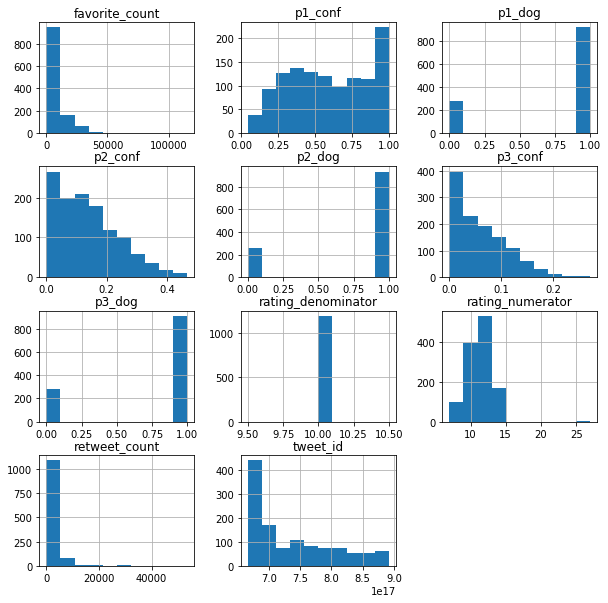

In [47]:
# Getting an overview of the data
master.hist(figsize = (10,10));

One insight that is drawn from the histograms is that the algorithm is very confident in it's 1st prediction p1 for most dogs. The confidence decreases for p2 and p3. The histogram is skewed to the right for p2_conf and p3_conf proving that for p2 and p3 the highest frequency occurs for a low confidence. This means for most cases, the first prediction p1 is the most accurate. 

In [48]:
master.p1_conf.mean()

0.59024907640167357

In [49]:
master.p2_conf.mean()

0.13795962461816988

In [50]:
master.p3_conf.mean()

0.061283250908851068

The mean values for p1, p2, and p3 further reinforce that the algorithm has most confidence in the first prediction for most cases.

##### Finding the most common name:

In [51]:
master.name.describe()

count        822
unique       628
top       Oliver
freq           8
Name: name, dtype: object

The dataset consists of 628 unique names in which Oliver is the most common occuring 8 times. 76.4% of the names were unique, and the remaining were repeated which means the vast majority of the dogs had unique names. 

##### Checking the distribution of the dog stage throughout the dataset

In [52]:
master['dog_stage'].value_counts()

                 996
pupper           139
doggo             34
puppo             15
doggo/pupper       5
floofer            4
doggo/puppo        1
doggo/floofer      1
Name: dog_stage, dtype: int64

This shows that the most common dog stage classification is pupper. 

##### The relation of dog stage on the favourite count

In [53]:
master.groupby(['dog_stage']).favorite_count.describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
,996.0,7670.505020,10740.650570,68.0,1378.50,3405.5,9920.75,115175.0
doggo,34.0,13163.029412,15543.877548,3170.0,6532.75,9051.0,11385.50,84937.0
doggo/floofer,1.0,15259.000000,NaN,15259.0,15259.00,15259.0,15259.00,15259.0
doggo/pupper,5.0,16258.800000,19375.046289,5751.0,7684.00,7898.0,9110.00,50851.0
doggo/puppo,1.0,42995.000000,NaN,42995.0,42995.00,42995.0,42995.00,42995.0
floofer,4.0,5121.000000,3361.684994,1982.0,3123.50,4376.5,6374.00,9749.0
pupper,139.0,6020.431655,6860.002164,599.0,2128.00,2953.0,6938.50,34318.0
puppo,15.0,13727.733333,13842.138968,2836.0,5616.00,8896.0,16791.50,55384.0


Analysis discussed in report.

##### The relation of dog stage on the retweet count

In [54]:
master.groupby(['dog_stage']).retweet_count.describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
,996.0,2176.560241,3550.810207,11.0,443.5,1076.0,2631.25,53531.0
doggo,34.0,4271.500000,6740.657095,830.0,1653.5,2293.5,3480.75,35688.0
doggo/floofer,1.0,2900.000000,NaN,2900.0,2900.0,2900.0,2900.00,2900.0
doggo/pupper,5.0,5006.000000,6205.931115,1821.0,2038.0,2171.0,2917.00,16083.0
doggo/puppo,1.0,16612.000000,NaN,16612.0,16612.0,16612.0,16612.00,16612.0
floofer,4.0,1926.500000,1676.432820,414.0,828.0,1544.5,2643.00,4203.0
pupper,139.0,1884.784173,2293.648365,81.0,577.5,1045.0,2124.00,14671.0
puppo,15.0,3787.533333,4314.463447,581.0,1298.0,2538.0,3902.50,16894.0


Analysis discussed in report.

##### Finding the relation between favorite count and retweet count

Text(0,0.5,'Retweet Count')

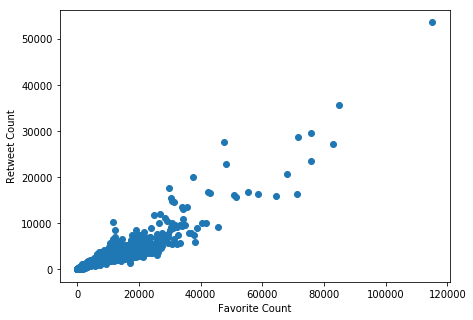

In [55]:
plt.figure(figsize=(7, 5))
plt.scatter(master['favorite_count'], master['retweet_count'])
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count')

Analysis in report. 